<a href="https://colab.research.google.com/github/saadkhalidabbasi/EDA-Projects/blob/main/Summer_Olympics_Medals_(1896_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing DataSet
df=pd.read_csv('olympics_dataset.csv')
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [3]:
df.columns

Index(['player_id', 'Name', 'Sex', 'Team', 'NOC', 'Year', 'Season', 'City',
       'Sport', 'Event', 'Medal'],
      dtype='object')

In [4]:
print(df.dtypes)

player_id     int64
Name         object
Sex          object
Team         object
NOC          object
Year          int64
Season       object
City         object
Sport        object
Event        object
Medal        object
dtype: object


In [5]:
df.isnull().sum()

,0
player_id,0
Name,0
Sex,0
Team,0
NOC,0
Year,0
Season,0
City,0
Sport,0
Event,0


## **Analysis of participation and medal distribution based on Gender from Olympics'1896-2024**

In [6]:
Gender_part = df[['Year','Sex','player_id']]
Gender_part.drop_duplicates()

,Year,Sex,player_id
0,1992,M,0
1,2012,M,1
2,1920,M,2
3,1900,M,3
4,1932,F,26
...,...,...,...
252560,2024,F,4986655
252561,2024,F,9460001
252562,2024,M,1972077
252563,2024,M,1899865


In [7]:
participation = Gender_part.groupby(['Year','Sex']).count().reset_index()

In [8]:
part_pivot = participation.pivot(index = 'Year',columns = 'Sex')

### **To observe gender-wise participation from Olympics'1896-2024**

<Figure size 1200x600 with 0 Axes>

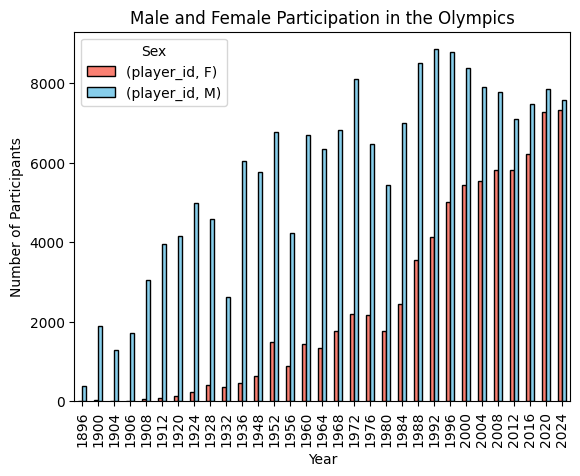

Number of Gender-wise participants each year
      player_id        
Sex          F       M
Year                  
1896       NaN   380.0
1900      33.0  1903.0
1904      16.0  1285.0
1906      11.0  1722.0
1908      47.0  3054.0
1912      87.0  3953.0
1920     134.0  4158.0
1924     244.0  4989.0
1928     404.0  4588.0
1932     347.0  2622.0
1936     468.0  6038.0
1948     628.0  5777.0
1952    1497.0  6773.0
1956     893.0  4234.0
1960    1435.0  6684.0
1964    1348.0  6354.0
1968    1777.0  6811.0
1972    2193.0  8111.0
1976    2172.0  6469.0
1980    1756.0  5435.0
1984    2447.0  7007.0
1988    3543.0  8494.0
1992    4124.0  8853.0
1996    5008.0  8772.0
2000    5431.0  8390.0
2004    5546.0  7897.0
2008    5816.0  7786.0
2012    5815.0  7105.0
2016    6223.0  7465.0
2020    7266.0  7855.0
2024    7312.0  7580.0


In [9]:
plt.figure(figsize=(12, 6))
part_pivot.plot(kind='bar', stacked=False, color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Male and Female Participation in the Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.legend(title='Sex')
plt.show()
print("Number of Gender-wise participants each year\n", part_pivot)

In [10]:
#subset with only [Gold, Silver, Bronze] labels_ No medal is fine too, getting to the olympics is a big deal :).
Legit_medals = df[df['Medal'] != 'No medal']

### **To observe distribution of medals between genders(M/F) from Olympics'1896-2024**

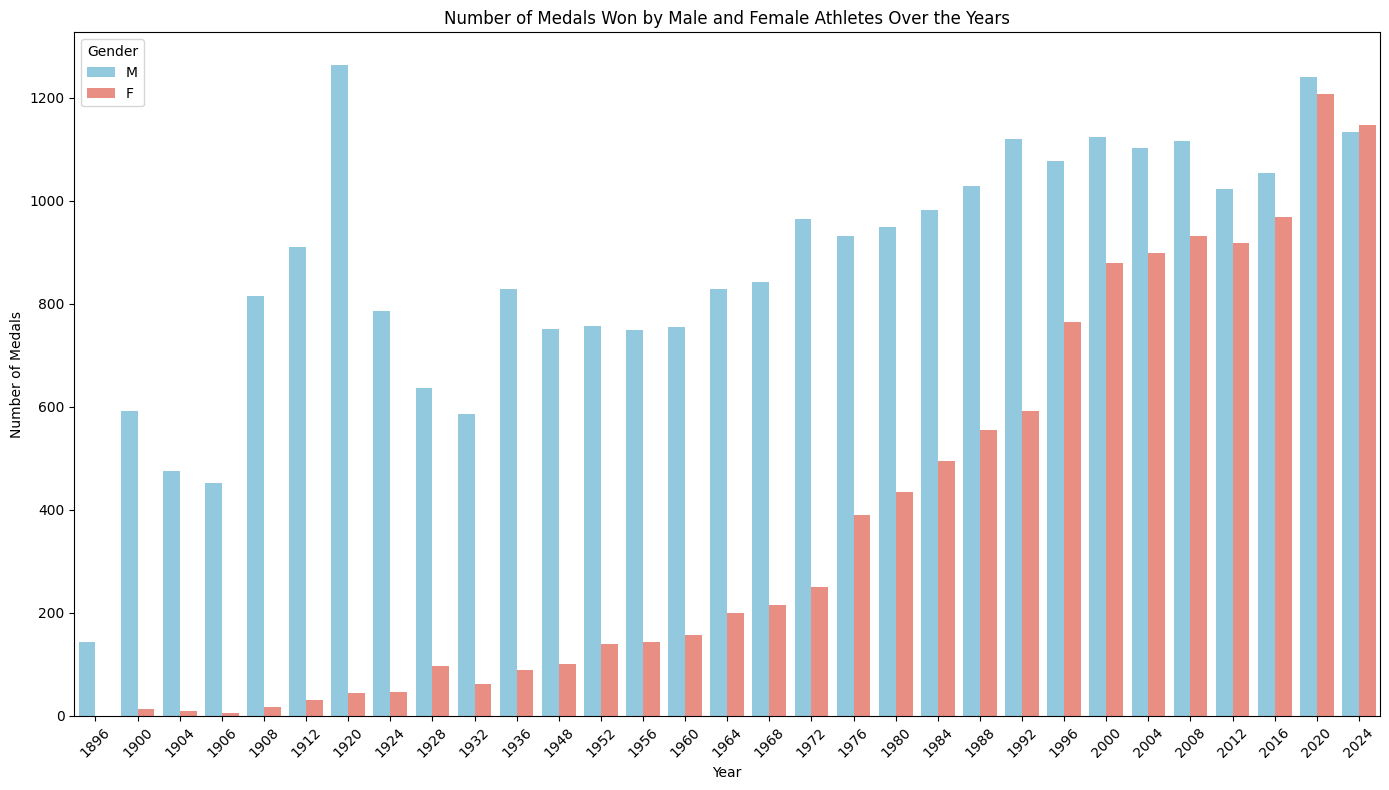

In [11]:
medal_counts_gender_years = Legit_medals.groupby(['Year', 'Sex']).size().reset_index(name='Number of Medals')

plt.figure(figsize=(14, 8))
sns.barplot(data=medal_counts_gender_years, x='Year', y='Number of Medals', hue='Sex', palette={'M': 'skyblue', 'F': 'salmon'})

plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Number of Medals Won by Male and Female Athletes Over the Years')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [12]:
Won_Medals = df[df['Medal']!='No medal'][['Year','Team','Medal']]

In [13]:
won_medal_counts = Won_Medals.groupby(['Year','Team']).count().reset_index()

### **Maximum number of medals won by each Team/Country from Olympics'1896-2024**

In [14]:
maxmedals_peryear = won_medal_counts.loc[won_medal_counts.groupby('Year')['Medal'].idxmax()]
maxmedals_peryear = maxmedals_peryear.rename(columns={'Medal': 'Medal Count'}).sort_values(by = 'Medal Count', ascending = False)
maxmedals_peryear.head()

,Year,Team,Medal Count
920,1980,Soviet Union,442
971,1984,United States,352
1865,2024,United States,321
1477,2008,United States,309
1019,1988,Soviet Union,300


In [15]:
maxmedals_peryear.tail()

,Year,Team,Medal Count
600,1952,United States,122
418,1928,United States,88
48,1900,France,75
162,1906,France,45
9,1896,Greece,44


### **Total number of participants from each Team/Country from Olympics'1896-2024**

In [16]:
Team_participation = df[['Year', 'Team', 'player_id']]
total_participations = Team_participation.groupby('Team').size().reset_index(name='Total Number of Participants')
total_participations.sort_values(by='Total Number of Participants',ascending = False)

,Team,Total Number of Participants
1105,United States,16236
425,Great Britain,11390
374,France,11360
520,Italy,9185
411,Germany,8622
...,...,...
137,Brandenburg,1
847,Ravel,1
142,Bremen,1
143,Brentina,1


## **United States" seems to be the Team/Country with the most number of participants and medals won over the years. Lets Explore**

In [17]:
US_df = df[df['Team'] == 'United States']

In [18]:
participants_per_year = US_df.groupby('Year')['player_id'].nunique().reset_index(name='Number of Participants')

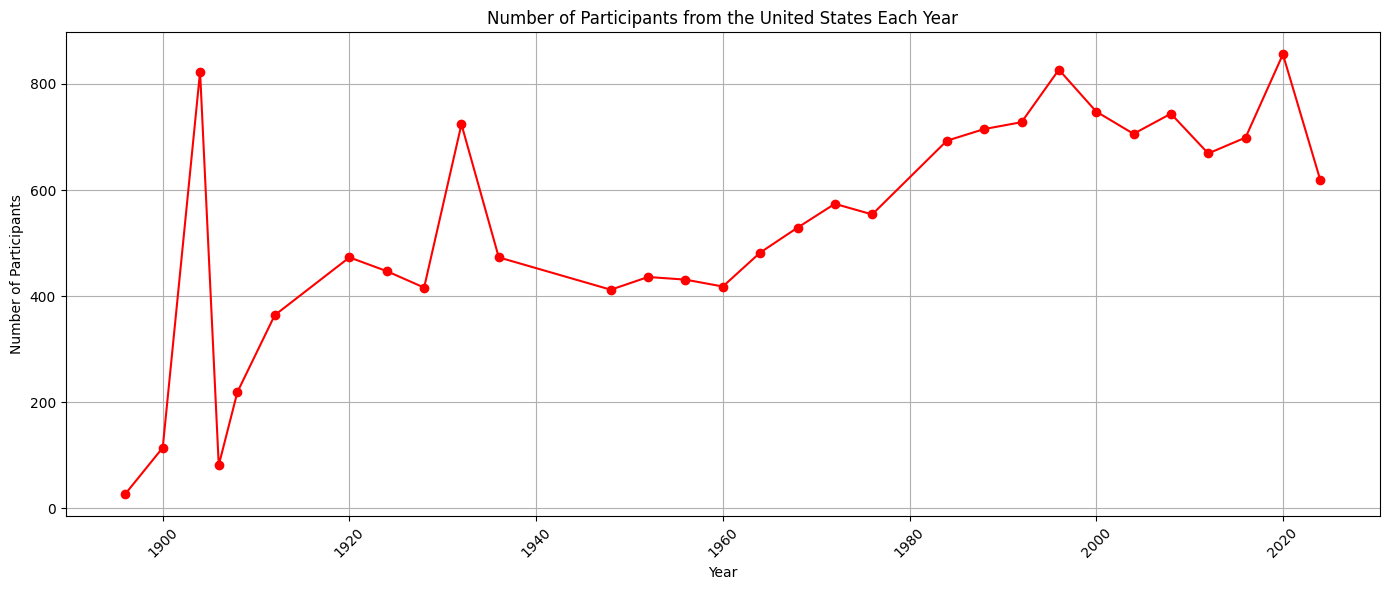

In [19]:
plt.figure(figsize=(14, 6))
plt.plot(participants_per_year['Year'], participants_per_year['Number of Participants'], marker='o', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.title('Number of Participants from the United States Each Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
us_sport_counts = US_df['Sport'].value_counts()

least_part_sport = us_sport_counts.idxmin()
Total_part_count = us_sport_counts.min()

print(f"The sport in which the United States participated the least is: {least_part_sport} with {Total_part_count} participation(s).")

The sport in which the United States participated the least is: Jeu De Paume with 2 participation(s).


In [21]:
df.Medal.unique()

array(['No medal', 'Gold', 'Bronze', 'Silver'], dtype=object)

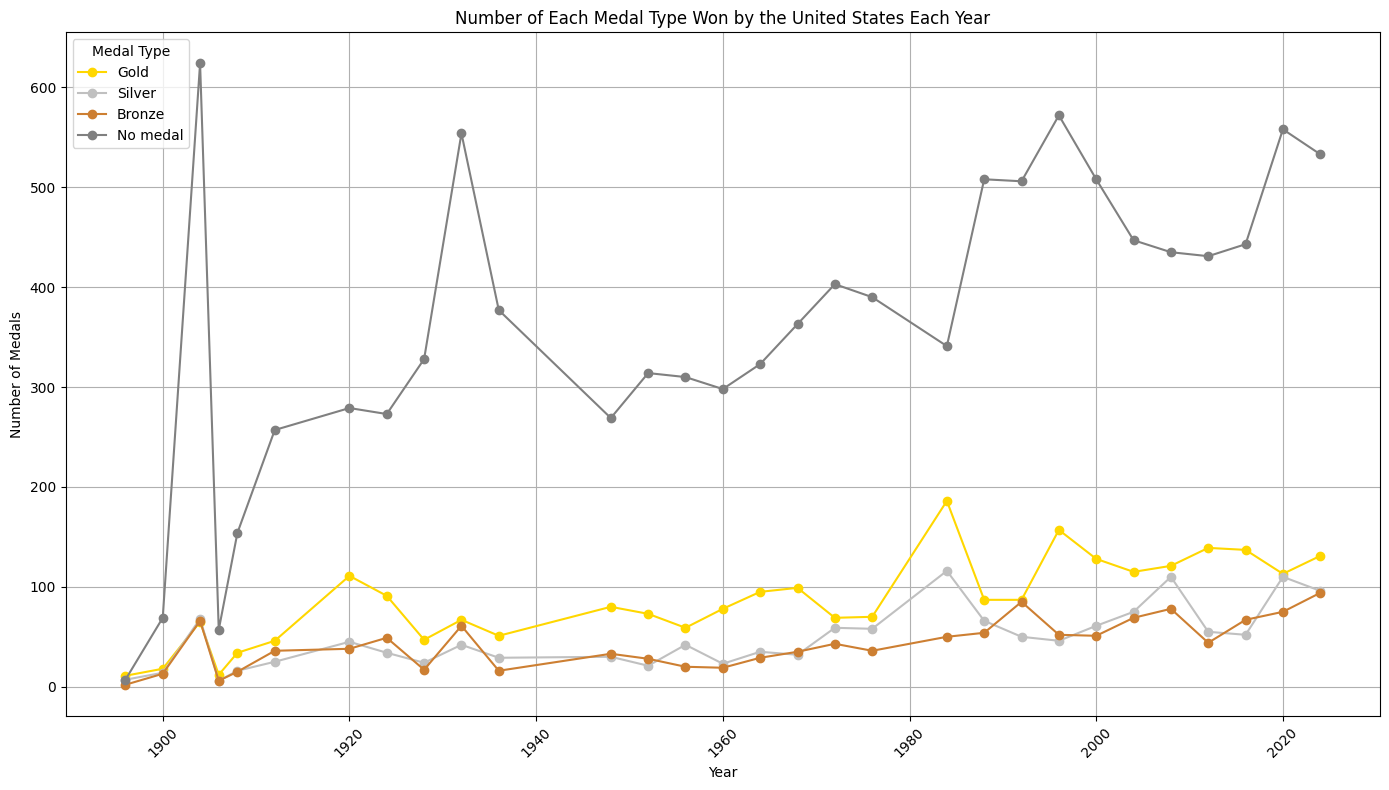

In [22]:
medal_counts_US = US_df.groupby(['Year', 'Medal']).size().unstack(fill_value=0).reset_index()

plt.figure(figsize=(14, 8))

medal_labels = ['Gold', 'Silver', 'Bronze', 'No medal']
colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#cd7f32', 'No medal': 'grey'}

for label in medal_labels:
    if label in medal_counts_US.columns:
        plt.plot(medal_counts_US['Year'], medal_counts_US[label], marker='o', label=label, color=colors[label])

plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Number of Each Medal Type Won by the United States Each Year')
plt.legend(title='Medal Type')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
US_medal_values = medal_counts_US.values
mean_medals = np.mean(US_medal_values)
median_medals = np.median(US_medal_values)
std_dev_medals = np.std(US_medal_values)
variance_medals = np.var(US_medal_values)

print(f"Mean number of medals won per year: {mean_medals}")
print(f"Median number of medals won per year: {median_medals}")
print(f"Standard deviation of medals won per year: {std_dev_medals}")
print(f"Variance in medals won per year: {variance_medals}")

Mean number of medals won per year: 500.28
Median number of medals won per year: 89.0
Standard deviation of medals won per year: 743.4336206189942
Variance in medals won per year: 552693.5482666666


In [24]:
gold_count = np.sum(US_df['Medal'] == 'Gold')
silver_count = np.sum(US_df['Medal'] == 'Silver')
bronze_count = np.sum(US_df['Medal'] == 'Bronze')

print(f"Gold Medals: {gold_count}")
print(f"Silver Medals: {silver_count}")
print(f"Bronze Medals: {bronze_count}")

total_medals = gold_count + silver_count + bronze_count
gold_proportion = gold_count / total_medals
silver_proportion = silver_count / total_medals
bronze_proportion = bronze_count / total_medals

print(f"Proportion of Gold Medals: {gold_proportion}")
print(f"Proportion of Silver Medals: {silver_proportion}")
print(f"Proportion of Bronze Medals: {bronze_proportion}")

Gold Medals: 2577
Silver Medals: 1447
Bronze Medals: 1281
Proportion of Gold Medals: 0.4857681432610745
Proportion of Silver Medals: 0.27276154571159283
Proportion of Bronze Medals: 0.2414703110273327


In [25]:
df.Sport.unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics', 'Cycling Road', 'Artistic Gymnastics',
       'Karate', 'Baseball/Softball', 'Trampoline Gymnastics',
       'Marathon Swimming', 'Canoe Slalom', 'Surfing', 'Canoe Sprint',
       'Cycling BMX Racing', 'Equestrian', 

### **Analysis of Sports participation and medals won by Teams/Countries in different Sports based on the Olympics'2024 data**

In [26]:
df_2024 = df[df['Year'] == 2024]
participants_per_sport_2024 = df_2024.groupby('Sport')['player_id'].nunique().reset_index(name='Number of Participants')
sports_2024 = participants_per_sport_2024.sort_values(by='Number of Participants', ascending=False)
print("Sports with the Most Number of Participants in 2024:")
print(sports_2024)

Sports with the Most Number of Participants in 2024:
                                  Sport  Number of Participants
5                             Athletics                    2020
40                             Swimming                     836
24                             Football                     553
33                               Rowing                     493
27                               Hockey                     415
26                             Handball                     386
28                                 Judo                     378
36                             Shooting                     342
35                              Sailing                     330
34                         Rugby Sevens                     317
46                           Volleyball                     311
49                            Wrestling                     291
7                            Basketball                     287
47                           Water Polo            

### **To observe which were the Teams/Countries that won the most medals from Olympics'1896-2024 in each sport**

In [27]:
medal_counts = Legit_medals.groupby(['Sport', 'Team', 'Medal']).size().unstack(fill_value=0).reset_index()
medal_counts['Total Medals'] = medal_counts[['Gold', 'Silver', 'Bronze']].sum(axis=1)

best_performance = medal_counts.loc[medal_counts.groupby('Sport')['Total Medals'].idxmax()]

for _, row in best_performance.iterrows():
    sport = row['Sport']
    team = row['Team']
    gold = row['Gold']
    silver = row['Silver']
    bronze = row['Bronze']

    print(f"Sport: {sport}")
    print(f"Team with the Best Performance: {team}")
    print(f"Gold Medals: {gold}")
    print(f"Silver Medals: {silver}")
    print(f"Bronze Medals: {bronze}")

Sport: 3x3 Basketball
Team with the Best Performance: Russia
Gold Medals: 0
Silver Medals: 8
Bronze Medals: 0
Sport: Aeronautics
Team with the Best Performance: Switzerland
Gold Medals: 1
Silver Medals: 0
Bronze Medals: 0
Sport: Alpinism
Team with the Best Performance: Germany
Gold Medals: 2
Silver Medals: 0
Bronze Medals: 0
Sport: Archery
Team with the Best Performance: South Korea
Gold Medals: 58
Silver Medals: 11
Bronze Medals: 9
Sport: Art Competitions
Team with the Best Performance: Germany
Gold Medals: 9
Silver Medals: 8
Bronze Medals: 9
Sport: Artistic Gymnastics
Team with the Best Performance: United States
Gold Medals: 9
Silver Medals: 6
Bronze Medals: 11
Sport: Artistic Swimming
Team with the Best Performance: China
Gold Medals: 11
Silver Medals: 10
Bronze Medals: 0
Sport: Athletics
Team with the Best Performance: United States
Gold Medals: 591
Silver Medals: 346
Bronze Medals: 244
Sport: Badminton
Team with the Best Performance: China
Gold Medals: 15
Silver Medals: 19
Bronze

### **Looking at the Sport of Wrestling to analyze It's popularity and growth over the years ***

In [29]:
wrestling_data = df[df['Sport'] == 'Wrestling']
wrestling_medals_data = wrestling_data[wrestling_data['Medal'] != 'No medal']

In [30]:
Wre_medals_per_year = wrestling_medals_data.groupby('Year').size().reset_index(name='Medals')
participants_per_year = wrestling_data.groupby('Year').size().reset_index(name='Participants')

merged_data = pd.merge(participants_per_year, Wre_medals_per_year, on='Year', how='left')

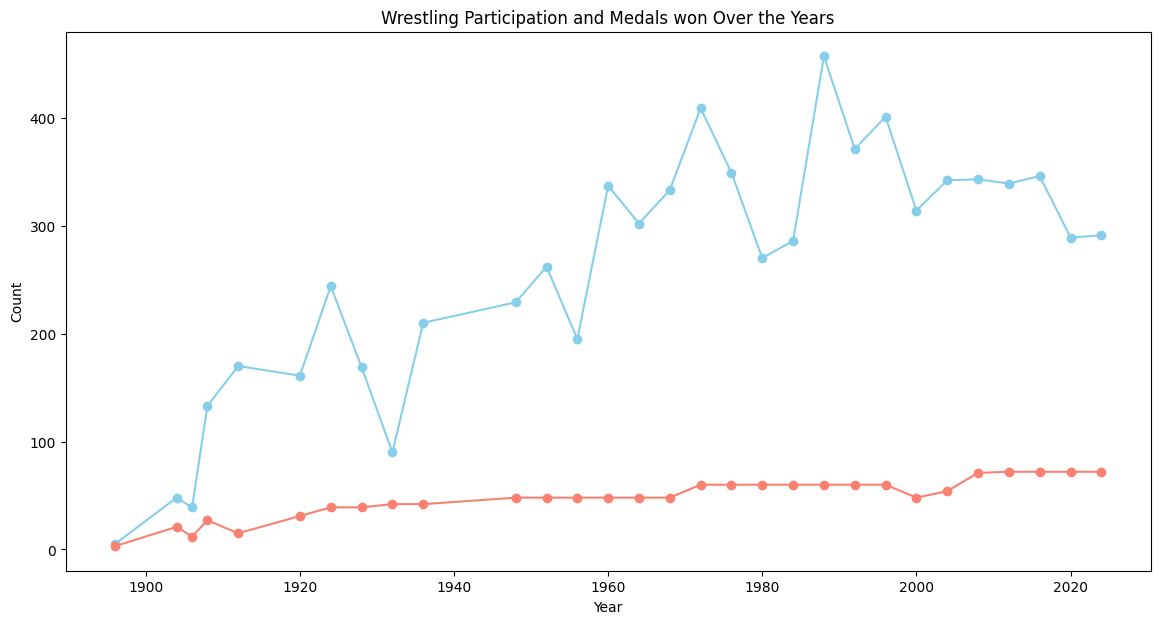

In [31]:
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Year'], merged_data['Participants'], marker='o', label='Participants', color='skyblue')
plt.plot(merged_data['Year'], merged_data['Medals'], marker='o', label='Medals', color='salmon')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Wrestling Participation and Medals won Over the Years')
plt.show()